<a href="https://colab.research.google.com/github/oo7-0310/bob_PT/blob/main/%5BBOB%5D%20%EB%B0%9C%ED%91%9C%ED%86%A4_%EC%8B%A0%EC%B2%B4%EA%B5%AC%EC%A1%B0_%EC%9D%B4%EC%9D%80%EA%B2%BD_%EC%A7%84%EC%A7%9C%EC%A7%84%EC%A7%9C%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 엑셀 파일에서 데이터 읽기
weather_df = pd.read_csv("ta.csv", header=None)

# card.csv에서 데이터 읽기
card_df = pd.read_excel("card.xlsx", header=None)

# 날짜 및 시간 포맷 수정
card_df['날짜'] = pd.to_datetime(card_df[0].str.split().str[0], format='%m.%d').apply(lambda x: x.replace(year=2023))
card_df['시간'] = card_df[0]
# '시간' 컬럼을 ':' 기준으로 나누기
# '10:09:12' 형식의 부분만 추출하기
card_df['시간'] = card_df['시간'].str.split(' ').str[1]

# '시간_정제' 컬럼을 ':' 기준으로 나누어 시, 분, 초 컬럼에 저장
card_df['시'] = card_df['시간'].str.split(':').str[0].astype(int)
card_df['분'] = card_df['시간'].str.split(':').str[1].astype(int)
card_df['초'] = card_df['시간'].str.split(':').str[2].astype(int)


# 필요없는 열 삭제
card_df.drop(columns=card_df.columns[:10], inplace=True)

# def extract_items(row):
#     items = [item for item in row.dropna().astype(str) if not item.isnumeric() and ':' not in item]
#     return ' '.join(items)

# # card_df['품목'] = card_df.iloc[:, 9:].apply(extract_items, axis=1)  # 인덱스가 변경되었으므로 8부터 시작
print(card_df)


# 빈 DataFrame 생성
new_card_df = pd.DataFrame()

# 각 행에 대해 지정된 범위의 값 중 비어있지 않은 항목들을 가져와서 새로운 DataFrame에 추가
for idx, row in card_df.iterrows():
    valid_items = row[:5].dropna()  # NaN이 아닌 값만 추출
    for item in valid_items:
        new_row = {
            '품목': item,
            '날짜': row['날짜'],
            '시간': row['시간'],
            '시': row['시'],
            '분': row['분'],
            '초': row['초']
        }
        new_card_df = new_card_df.append(new_row, ignore_index=True)

        10      11      12    13   14   15         날짜        시간   시   분   초
0    과일음료수   과일음료수   과일음료수   NaN  NaN  NaN 2023-08-14  10:09:12  10   9  12
1     과일젤리    과일젤리    과일젤리   NaN  NaN  NaN 2023-08-13  00:21:01   0  21   1
2     외국젤리    외국젤리    외국젤리   핫식스  핫식스  핫식스 2023-08-12  03:33:17   3  33  17
3     삼각김밥     NaN     NaN   NaN  NaN  NaN 2023-08-12  01:11:34   1  11  34
4      초콜릿     NaN     NaN   NaN  NaN  NaN 2023-08-11  22:23:21  22  23  21
5      얼음컵     NaN     NaN   NaN  NaN  NaN 2023-08-11  19:57:27  19  57  27
6       젤리     NaN     NaN   NaN  NaN  NaN 2023-08-09  17:46:47  17  46  47
7       커피      커피     NaN   NaN  NaN  NaN 2023-08-08  22:24:37  22  24  37
8     과일젤리     NaN     NaN   NaN  NaN  NaN 2023-08-08  17:53:02  17  53   2
9     과일젤리     NaN     NaN   NaN  NaN  NaN 2023-08-08  00:11:23   0  11  23
10    삼각김밥    삼각김밥     NaN   NaN  NaN  NaN 2023-08-07  14:18:21  14  18  21
11     얼음컵     마들렌     NaN   NaN  NaN  NaN 2023-08-06  12:27:10  12  27  10
12    삼각김밥  

<ipython-input-2-f1991e1d95d7>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_card_df = new_card_df.append(new_row, ignore_index=True)
<ipython-input-2-f1991e1d95d7>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_card_df = new_card_df.append(new_row, ignore_index=True)
<ipython-input-2-f1991e1d95d7>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_card_df = new_card_df.append(new_row, ignore_index=True)
<ipython-input-2-f1991e1d95d7>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_card_df = new_card_df.append(new_row, ignore_index=True)
<ipython-input-2-f1991e1d95d7>:51: FutureWarning: The frame.append method is

In [3]:
# 적절한 컬럼명 부여
weather_df.columns = ['날짜', '지역번호', '평균온도', '최저온도', '최고온도', '강수량']

# 날짜 형식을 " 2023-07-04"에서 "2023-07-04"로 변경
weather_df['날짜'] = weather_df['날짜'].str.strip()

# 지역번호 열 제거
weather_df.drop(columns=['지역번호'], inplace=True)

weather_df['날짜'] = pd.to_datetime(weather_df['날짜'])

In [4]:
# '날짜'를 기준으로 데이터 병합
merged_df = pd.merge(new_card_df, weather_df, on='날짜')

In [5]:
# 요일 정보 추가 (0:월요일, 1:화요일, ..., 6:일요일)
merged_df['요일'] = merged_df['날짜'].dt.dayofweek

In [6]:
# 분류를 위한 입력(X) 및 타깃(y) 변수 설정
X = merged_df[['평균온도', '최고온도', '최저온도', '강수량', '요일', '시', '분', '초']]
y = merged_df['품목']

# NaN 값을 포함하는 행 제거
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index]  # X의 NaN 값을 제거한 인덱스에 해당하는 y 값만 가져옵니다.

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 분류 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 특정 날짜, 기온, 시간, 요일을 정했을 때 예측
sample_data = [[25, 30, 20, 0, 3, 1, 5, 8]]  # 평균기온, 최고기온, 최저기온, 강수량, 요일(0:월요일), 시, 분, 초
sample_data_scaled = scaler.transform(sample_data)

predicted_item = knn.predict(sample_data_scaled)
print(f"예측된 구매 품목: {predicted_item[0]}")

예측된 구매 품목: 외국젤리


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


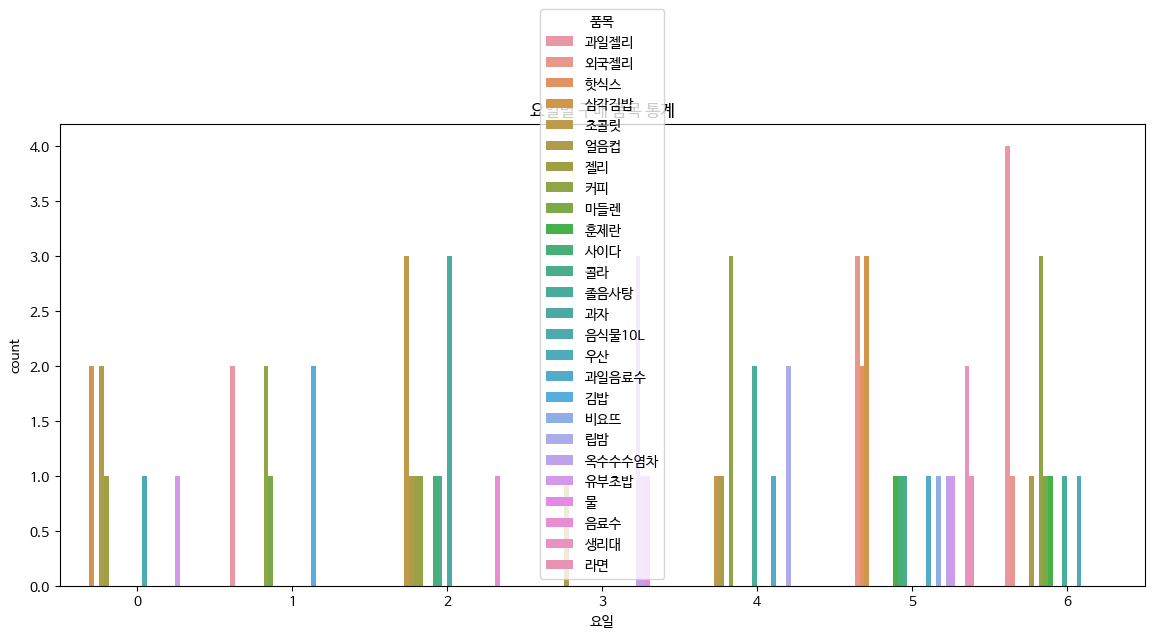

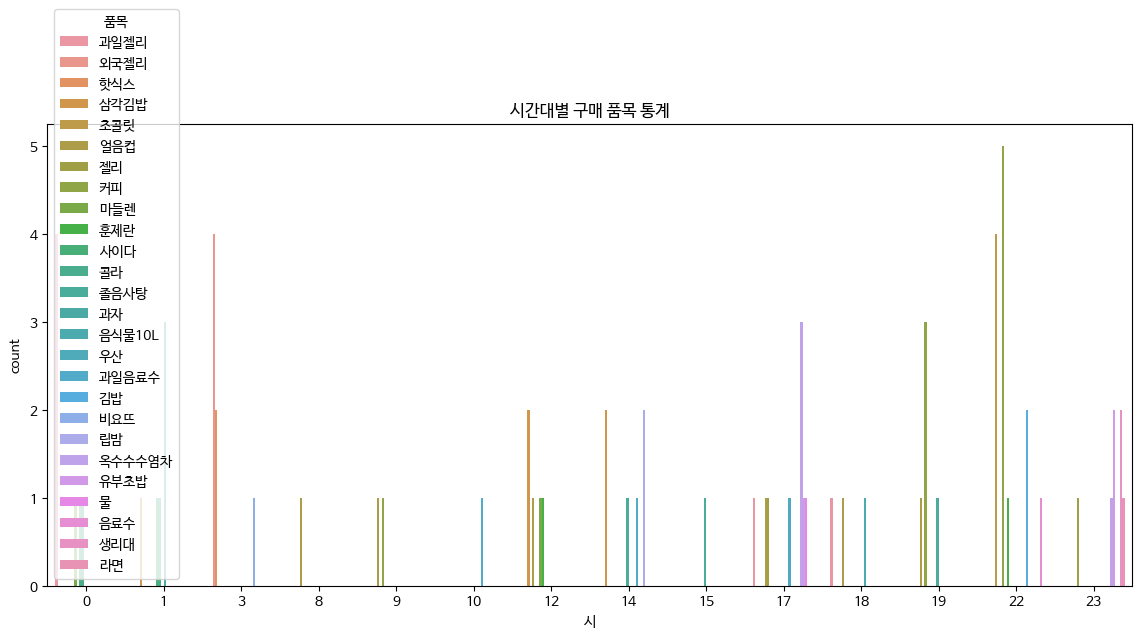

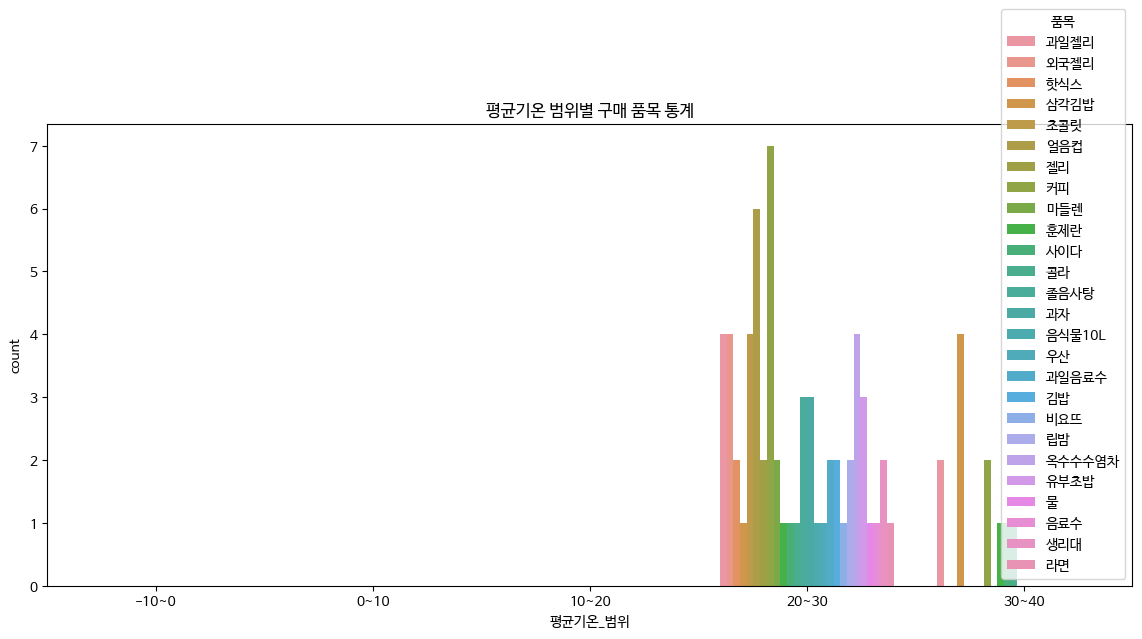

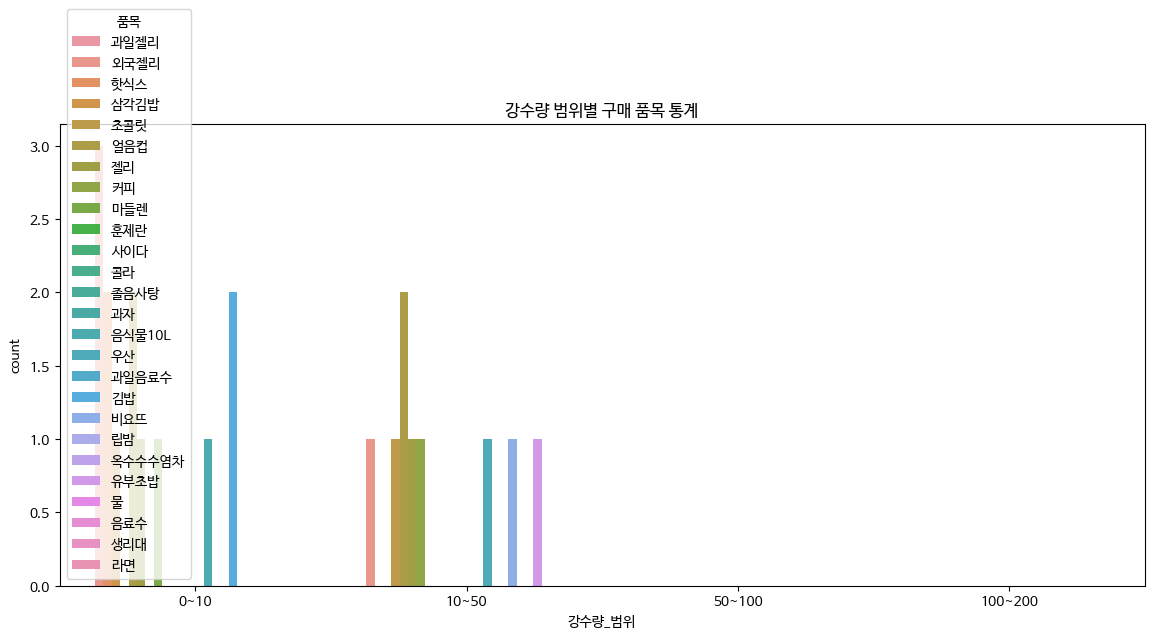

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# 날씨에 대한 범위를 지정합니다.
merged_df['평균기온_범위'] = pd.cut(merged_df['평균온도'], bins=[-10, 0, 10, 20, 30, 40], labels=['-10~0', '0~10', '10~20', '20~30', '30~40'])
merged_df['강수량_범위'] = pd.cut(merged_df['강수량'], bins=[0, 10, 50, 100, 200], labels=['0~10', '10~50', '50~100', '100~200'])

# 시각화 부분
# 요일별 품목 구매 통계 시각화
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='요일', hue='품목')
plt.title('요일별 구매 품목 통계')
plt.show()

# 시간대별 품목 구매 통계 시각화
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='시', hue='품목')
plt.title('시간대별 구매 품목 통계')
plt.show()

# 평균기온 범위별 품목 구매 통계 시각화
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='평균기온_범위', hue='품목')
plt.title('평균기온 범위별 구매 품목 통계')
plt.show()

# 강수량 범위별 품목 구매 통계 시각화
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='강수량_범위', hue='품목')
plt.title('강수량 범위별 구매 품목 통계')
plt.show()
